In [1]:
from ESN import simple_ESN as sesn
import ESN
import ESNteachers as teach
import numpy as np
import aux
import matplotlib.pyplot as plt

[0.4575031496822617, 1.2964730360068142]

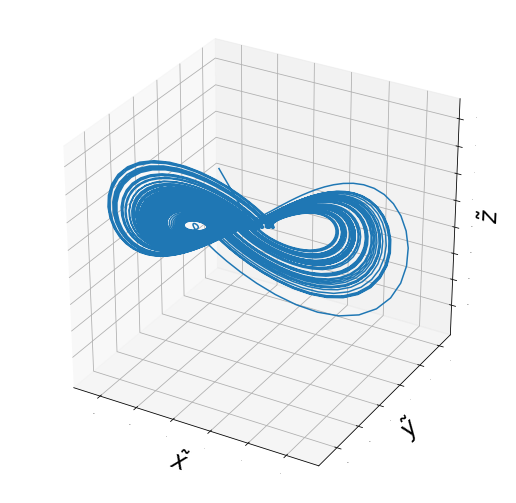

In [2]:
x, y, z = teach.Lorenz(400, 0.01)
xrun, yrun, zrun = teach.Lorenz(10000, 0.01)
yz = np.concatenate((y,z), axis=1)
xz = np.concatenate((x,z), axis=1)
xy = np.concatenate((x,y), axis=1)
linearcoef=[0.76159, 0.41997]

lor = sesn(N=400, K=1, L=2, binary_node=0,a=1.0)
W = lor.generate_W(rho=0.9, dens=0.25, cont=0)
Win=lor.generate_Win(dens=0.8)

trainy = lor.train_ESN(input_dat=y, teacher=xz, around=linearcoef, order='power', washout=100, mp=False, B=10**-2)

testruny = lor.run_ESN(input_dat=yrun,around=linearcoef, order='power',time=10000)

lorattractory=lor.plot_attractor(name='testLorenzy')

yout = lor.outputs
y=lor.input

yrun1, yrun2=np.hsplit(yout, 2)
yrms=[aux.RMS(yrun1, xrun), aux.RMS(yrun2, zrun)]
yrmse1=aux.RMS_over_t(yrun1, xrun)
yrmse2=aux.RMS_over_t(yrun2, zrun)
yrmse = [yrms, yrmse1, yrmse2]

yrms

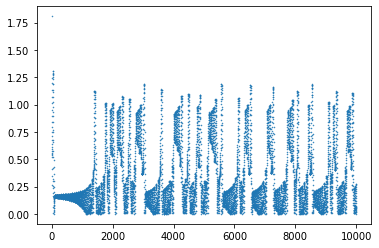

In [3]:
plt.plot(yrmse1, '.', markersize=1)
plt.show()

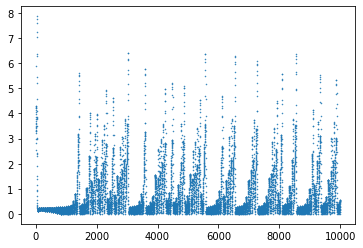

In [4]:
plt.plot(yrmse2, '.', markersize=1)
plt.show()

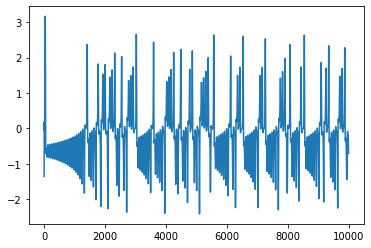

In [5]:
plt.plot(yrun1)

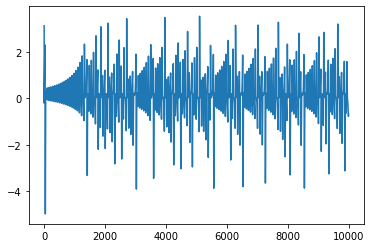

In [6]:
plt.plot(yrun2)

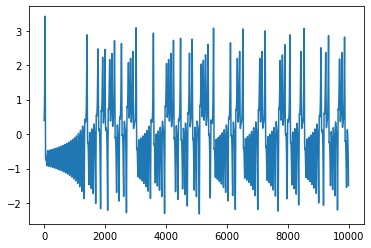

In [7]:
plt.plot(y)